# INF285 - Computación Científica
# Laboratorio 0 - Código Base
## 21 de marzo de 2025

## Librerías y/o funciones 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat

**Generación de números pseudo-aleatorios**

La librería `random` de Numpy permite generar números pseudo-aleatorios a través de un *generador* al cual se le puede indicar alguna *semilla (seed)*.

In [2]:
#sin indicar semilla
rng = np.random.default_rng()
rng.random()

0.9398022285073995

In [3]:
#indicando una semilla en particular
rng = np.random.default_rng(seed=99)
rng.random()

0.5060306745483945

In [4]:
#generamos un array con 5 elementos aleatorios en el intervalo [0.0,1.0)
rng.random(5)

array([0.56509163, 0.51191596, 0.97218637, 0.61490314, 0.5682835 ])

In [5]:
#generamos un array de dimension 4 x 3 con elementos aleatorios en el intervalo [0.0,1.0)
rng.random((4,3))

array([[0.28678672, 0.55451145, 0.46752353],
       [0.61005801, 0.9304425 , 0.24588538],
       [0.30943834, 0.39107965, 0.27027173],
       [0.35001495, 0.93622969, 0.37788422]])

In [6]:
#¿Cómo generamos valores en algún intervalo [a,b)? 
#Simplemente realizamos un cambio de intervalo
a,b = 2.,4.
a + (b - a)*rng.random(5)

array([3.54929842, 2.08113448, 2.59731119, 3.40518229, 2.90450524])

## Estimación de $\pi$


Esta famosa constante matemática $\pi = 3.14159265359\dots$ podemos estimarla utilizando el método de Monte Carlo, el cual consiste en obtener una cantidad de muestras aleatorias para realizar un cálculo numérico. En este caso, obtendremos muestras aleatorias para obtener una estimación de $\pi$.

La idea es simular puntos aleatorios $(x,y)$ dentro de un cuarto de circunferencia de radio $1$. El objetivo es contar la cantidad de puntos que hay en el cuarto de circunferencia, de tal forma de encontrar una relación entre el área del cuarto de circunferencia y el área total de muestreo.

En el siguiente gráfico se muestra una idea:


![title](pi_estimation.png)

Sabemos que el área del espacio de muestreo es $1$, mientras que el área del cuarto de circunferencia es $\pi/4$. Por lo tanto la razón entre las áreas es:

$$
\dfrac{\text{area cuarto de circunferencia}}{\text{area total}} = \dfrac{\pi/4}{1}
$$

Luego si tomamos una gran cantidad de muestras aleatorias, entonces:

$$
\dfrac{\text{area cuarto de circunferencia}}{\text{area total}} = \dfrac{\text{cantidad de puntos dentro del cuarto de circunferencia}}{\text{cantidad de muestras totales}} = \pi/4
$$

Entonces podemos estimar $\pi$ como:

$$
\pi \approx \dfrac{4 \times \text{cantidad de puntos dentro del cuarto de circunferencia}}{\text{cantidad de muestras totales}}
$$

A continuación se muestra un código que estima $\pi$ utilizando **list comprehension**:

In [7]:
'''
input
n    : (int)    number of random points.
seed : (int)    a seed to initialize the random generator.

output
pi_a : (double) approximation of pi.
'''
def compute_pi_slow(n,seed=9_999):
    rng = np.random.default_rng(seed=seed)
    x = [rng.random() for i in range(n)]
    y = [rng.random() for i in range(n)]
    
    d = [x[i]**2 + y[i]**2 for i in range(n)]
    inside = 0
    for i in range(n):
        if d[i] < 1:
            inside += 1
    pi_a = 4*inside / n
    return pi_a

Calculamos el tiempo que se demora la función `calcular_pi_list` utilizando **list comprehension** con $n=10000$ muestras aleatorias para estimar $\pi$.

In [8]:
#tiempo de función con lista
t1 = %timeit -n 1000 -r 1 -o compute_pi_slow(10000)

13.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)


## Pregunta 1

### Pregunta 1.1 (40 puntos)

Construya la función `compute_pi_fast(n)` que estime el valor de $\pi$ utilizando `numpy array` y considerando $n$ muestras aleatorias. Usted debe utilizar la siguiente firma:

In [21]:
'''
input
n    : (int)    number of random points.
seed : (int)    a seed to initialize the random generator.

output
pi_a : (double) approximation of pi.
'''

def compute_pi_fast(n, seed=9_999):
    rng = np.random.default_rng(seed=seed)
    x = rng.random(n)
    y = rng.random(n)

    d = np.power(x,2) + np.power(y,2)
    inside = np.sum(d < 1)
    pi_a = 4*inside / n
    return pi_a
x = compute_pi_fast(10000)
print(x)

3.1772


Podemos calcular el tiempo que se demora estimar $\pi$ con `numpy array` utilizando $10000$ muestras aleatorias.

In [11]:
#tiempo de función con array
t2 = %timeit -o compute_pi_fast(10000)

136 μs ± 2.34 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Se calcula las veces que, estimar $\pi$ con `numpy array`, es mejor que con **list comprehension**.

In [12]:
t1.average/t2.average

97.13772176922173

A continuación realizaremos una comparación entre el cálculo para $\pi$ utilizando **list comprehension** y **Numpy**.

Ejecute el siguiente código:

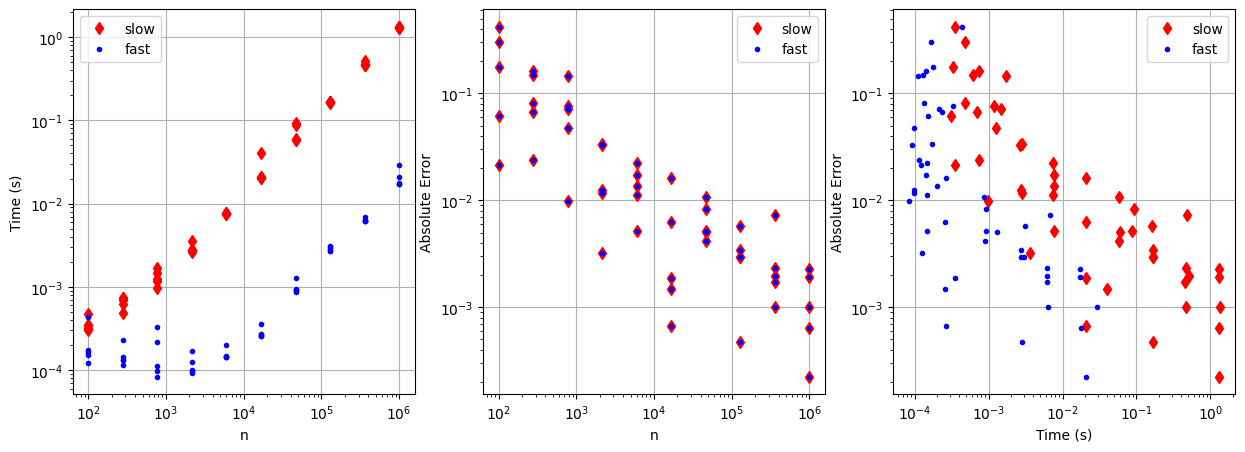

In [13]:
def show_comparison_for_pi():
    N = 10 # Sample size for 'n'
    K = 5 # Sample size for different seeds used
    n_array = np.logspace(2,6,N,dtype=int) # Array to store the logscale used for n
    
    comp_time_slow = np.zeros((N,K))
    comp_error_slow = np.zeros((N,K))
    
    comp_time_fast = np.zeros((N,K))
    comp_error_fast = np.zeros((N,K)) 
    
    for i, n in np.ndenumerate(n_array):
        for k in range(K):
            time_n_k = %timeit -n 1 -r 1 -o -q compute_pi_slow(n,k)
            out_n_k=compute_pi_slow(n,k)
            comp_time_slow[i,k] = time_n_k.average
            comp_error_slow[i,k] = np.abs(np.pi-out_n_k)
            
            time_n_k = %timeit -n 1 -r 1 -o -q compute_pi_fast(n,k)
            out_n_k=compute_pi_fast(n,k)
            comp_time_fast[i,k] = time_n_k.average
            comp_error_fast[i,k] = np.abs(np.pi-out_n_k)

    plt.figure(figsize=(15,5))
    plt.subplot(133)
    plt.loglog(comp_time_slow.flatten(),comp_error_slow.flatten(),'rd',label='slow')
    plt.loglog(comp_time_fast.flatten(),comp_error_fast.flatten(),'b.',label='fast')
    plt.legend(loc='best')
    plt.xlabel('Time (s)')
    plt.ylabel('Absolute Error')
    plt.grid()
    
    plt.subplot(131)
    nn = repmat(n_array[:,np.newaxis],1,K)
    plt.loglog(nn.flatten(),comp_time_slow.flatten(),'rd',label='slow')
    plt.loglog(nn.flatten(),comp_time_fast.flatten(),'b.',label='fast')
    plt.legend(loc='best')
    plt.xlabel('n')
    plt.ylabel('Time (s)')
    plt.grid()

    plt.subplot(132)
    plt.loglog(nn.flatten(),comp_error_slow.flatten(),'rd',label='slow')
    plt.loglog(nn.flatten(),comp_error_fast.flatten(),'b.',label='fast')
    plt.legend(loc='best')
    plt.xlabel('n')
    plt.ylabel('Absolute Error')
    plt.grid()
    plt.show()
    
show_comparison_for_pi()

### Pregunta 1.2 (10 puntos)

Como usted puede observar, en el gráfico central (Absolute Error v/s $n$) los valores entregados por `compute_pi_slow` y `compute_pi_fast` son iguales ¿Por qué ocurre este fenómeno?

**Indique en esta celda su respuesta:**

**-----------------------------------**

**R:**

**-----------------------------------**

## Pregunta 2

Sea la integral,
$$
I = \int_{t_a}^{t_b} g(t)\,dt \quad \text{donde} \quad t_a \leq t \leq t_b \quad \text{ y } \quad 0 \leq g(t) \leq C
$$

### Pregunta 2.1 (40 puntos)
Utilizando el método de Monte Carlo aplicado anteriormente para la estimación de $\pi$, estime la integral $I$ utilizando $n$ muestras aleatorias. Usted debe utilizar la siguiente firma:

In [24]:
'''
input
g     :(callable) function to integrate.
ta    :(double)   lower limit of integral.
tb    :(double)   upper limit of integral.
C     :(double)   upper limit of g(t) in the interval [ta,tb].
n     :(int)      number of points.

output
e_int :(double)   estimation of integral.
'''
def estimate_integral(g, ta, tb, C, n):
    rng = np.random.default_rng()
    t = ta + (tb - ta)*rng.random(n)
    y = C*rng.random(n)
    g_t = g(t)
    e_int = (tb - ta)*C*np.sum(y < g_t)/n
    return e_int


### Pregunta 2.2 (10 puntos)

Estime el valor de la siguiente integral utilizando la función anterior para $n = 10000$ muestras:

$$
I = \int_{2\pi}^{11\pi/4} (3\sin(t) + \cos(t))\,dt \quad \text{donde} \quad 2\pi \leq t \leq 11\pi/4 \quad \text{y} \quad 0 \leq g(t) \leq 4
$$

In [27]:
n = 10_000
# Define the function g(t)
g = lambda t: 3 * np.sin(t) + np.cos(t)
ta = 2*np.pi
tb = 11*np.pi/4
C = 4
#--------------------------------
I = estimate_integral(g,ta,tb,C,n)
print(I)

5.87823401413186


In [ ]:
rng.random(10)

array([0.88985789, 0.43510003, 0.6235598 , 0.58537972, 0.59913174,
       0.65568566, 0.51128198, 0.19367975, 0.06896738, 0.25204569])